_Natural Language Processing_

_MBD @IE_

_Jorge Meneu | Mukhtadir Syed | Zhizheng Wang | Kaumu Joshi_


# Fake News Classifier


<img width="1000" style="float:left" 
     src="https://i.imgur.com/Cv7aSif.png" />
     

In the era of information, misinformation proliferates at the same pace. Despite the evolution of humanity, our instincts to spread rumors and lies remain unchanged. As the old saying goes: lies spread faster than truth. Gossip seems to be inherent to human nature, and it can be difficult to combat.

To make matters worse, the abundance of data and speed of access to information, combined with the prevalence of click-bait content across news outlets, has only intensified the problem. It seems like this could turn into a never.ending vicious cycle, with devastating damage in society.

We refuse to accept this fate. In fact, we believe that some of the very same factors that have contributed to this information overload can also be leveraged to combat the pandemic of misinformation. 

Today, we introduce Factify: where facts meet AI.
     




# Table of Contents

## Part A Traditional NLP

* [1. Importing all the Libraries](#1)
* [2. Data Load](#2)
* [3. Exploratory Data Analysis of our training set](#3)
* [4. Textual Evaluation of our training set](#4)
* [5. Text Preprocessing using NLTK library](#5)
    * [5.1 Creating the Corpus](#5.1)
* [6. Modeling](#6)
    * [6.1 MultinomialNB Algorithm](#6.1)
        * [6.1.1 Test set Transformation](#6.1.1)
            * [6.1.2 Training on entire training set and predictions on test](#6.1.2)
    * [6.2 Support Vector Machines](#6.2)
    * [6.3 Passive Aggressive Algorithm](#6.3)
    * [6.4 Max Ent Classifier](#6.4)
    
## Part B NLP with Neural Networks
    
* [7. Neural Networks- LSTM](#7)
    * [7.1 Text Pre-processing for LSTM](#7.1)
    * [7.2 Model Construction & Training](#7.2)
    * [7.3 Test set transformation](#7.3)
    * [7.4 Predictions and Submission file](#7.4)
* [8. Transformers and transfer learning](#8)
    * [8.1 Importing all the required libraries and loading the train set](#8.1)
    * [8.2 Define pretrained tokenizer and model](#8.2)
    * [8.3 Creating our training and validation set](#8.3)
    * [8.4 Function to create torch dataset](#8.4)
    * [8.5 Applying the function to our train and validation set](#8.5)
    * [8.6 Define Trainer parameters to fine tune model](#8.6)
    * [8.7 Test transformation Set from Kaggle](#8.7)
    * [8.8 Predictions on test](#8.8)
* [9. Conclusion](#9)




# Part A Traditional NLP

## 1. Importing all the Libraries <a name=1></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import string
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
import numpy as np
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
import re
pd.set_option('display.max_rows', None)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Loading the Dataset<a name=2></a>

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NLP/train.csv', encoding="utf-8")


train.csv: A full training dataset with the following attributes:

id: unique id for a news article
title: the title of a news article
author: author of the news article
text: the text of the article; could be incomplete
label: a label that marks the article as potentially unreliable
1: unreliable
0: reliable
test.csv: A testing training dataset with all the same attributes at train.csv without the label.
submit.csv: A sample submission that you can



In [ ]:
df.head()



,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:

df.drop('author', axis=1, inplace=True) # we will not be using this column

In [ ]:
df = df.dropna().reset_index(drop=True) # There are some missing values in the title column

In [ ]:
df.shape # we will use this dataframe to do some EDA on our title and text columns

(20203, 4)

In [ ]:
df1=df[['text','label']].dropna() # we only need these columns for our NLP tasks and we will use this dataframe while df we will use for some EDA



## 3. EDA<a name=3></a>

In [ ]:
# changing data types of certain columns
df[['title', 'text']]= df[['title', 'text']].astype('str')
df.dtypes

id        int64
title    object
text     object
label     int64
dtype: object

In [ ]:
# here we calculate the average title length
avg = 0
for i in range(len(df)):
  avg += len(df['title'][i])
average = avg/len(df)
print(f'Average lenght of title column is: {format(average, ".2f")}')


Average lenght of title column is: 74.28


In [ ]:
# Similarly for our text column, this is the main column that will be used for classification
avg_txt = 0
for i in range(len(df)):
  avg_txt += len(df['text'][i])
average_txt = avg_txt/len(df)
print(f'Average lenght of text column is: {format(average_txt, ".2f")}')



Average lenght of text column is: 4668.04


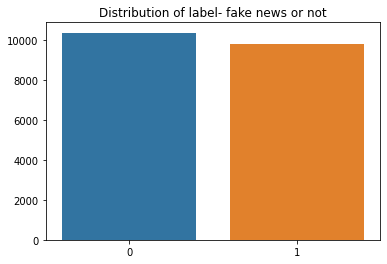

In [ ]:
# checking for ditibution of the label column

sns.barplot(data=(df['label'].value_counts().to_frame().transpose()))
plt.title('Distribution of label- fake news or not')
plt.show()

# we have a balanced data set

In [ ]:
df['title_length'] = df['title'].apply(len) # calculating lenght of title
df['text_length'] = df['text'].apply(len) # calculating lenght of text

# this is just for our initial EDA



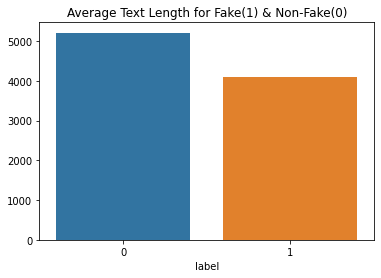

In [ ]:
text=df.groupby('label')['text_length'].mean().to_frame().transpose()
bar=sns.barplot(data=text)
plt.title('Average Text Length for Fake(1) & Non-Fake(0)')
plt.show()

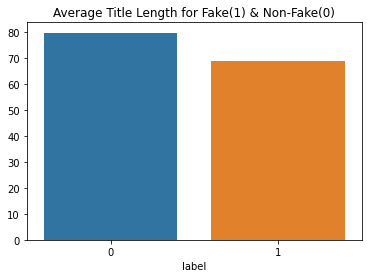

In [ ]:
title=df.groupby('label')['title_length'].mean().to_frame().transpose()
bar=sns.barplot(data=title)
plt.title('Average Title Length for Fake(1) & Non-Fake(0)')
plt.show()

## 4. Textual evaluation of our training set<a name=4></a>
- word_count: the number of words in each article
- unique_word_count: the number of unique words in each article
- stop_word_count: the number of stop words (common words such as "the", "and", etc.) in each article
- url_count: the number of URLs (web addresses) in each article
- mean_word_length: the average length of words in each article
- char_count: the total number of characters (including spaces and punctuation) in each article
- punctuation_count: the number of punctuation marks in each article
- hashtag_count: the number of hashtags (words or phrases preceded by a # symbol) in each article
- mention_count: the number of mentions (words or phrases preceded by a @ symbol) in each article

In [ ]:
news=df.copy()
# word_count
news['word_count'] = news['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
news['unique_word_count'] = news['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
news['stop_word_count'] = news['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in nltk.corpus.stopwords.words("english")]))

# url_count
news['url_count'] = news['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
news['mean_word_length'] = news['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
news['char_count'] = news['text'].apply(lambda x: len(str(x)))

# punctuation_count
news['punctuation_count'] = news['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
news['hashtag_count'] = news['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
news['mention_count'] = news['text'].apply(lambda x: len([c for c in str(x) if c == '@']))


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


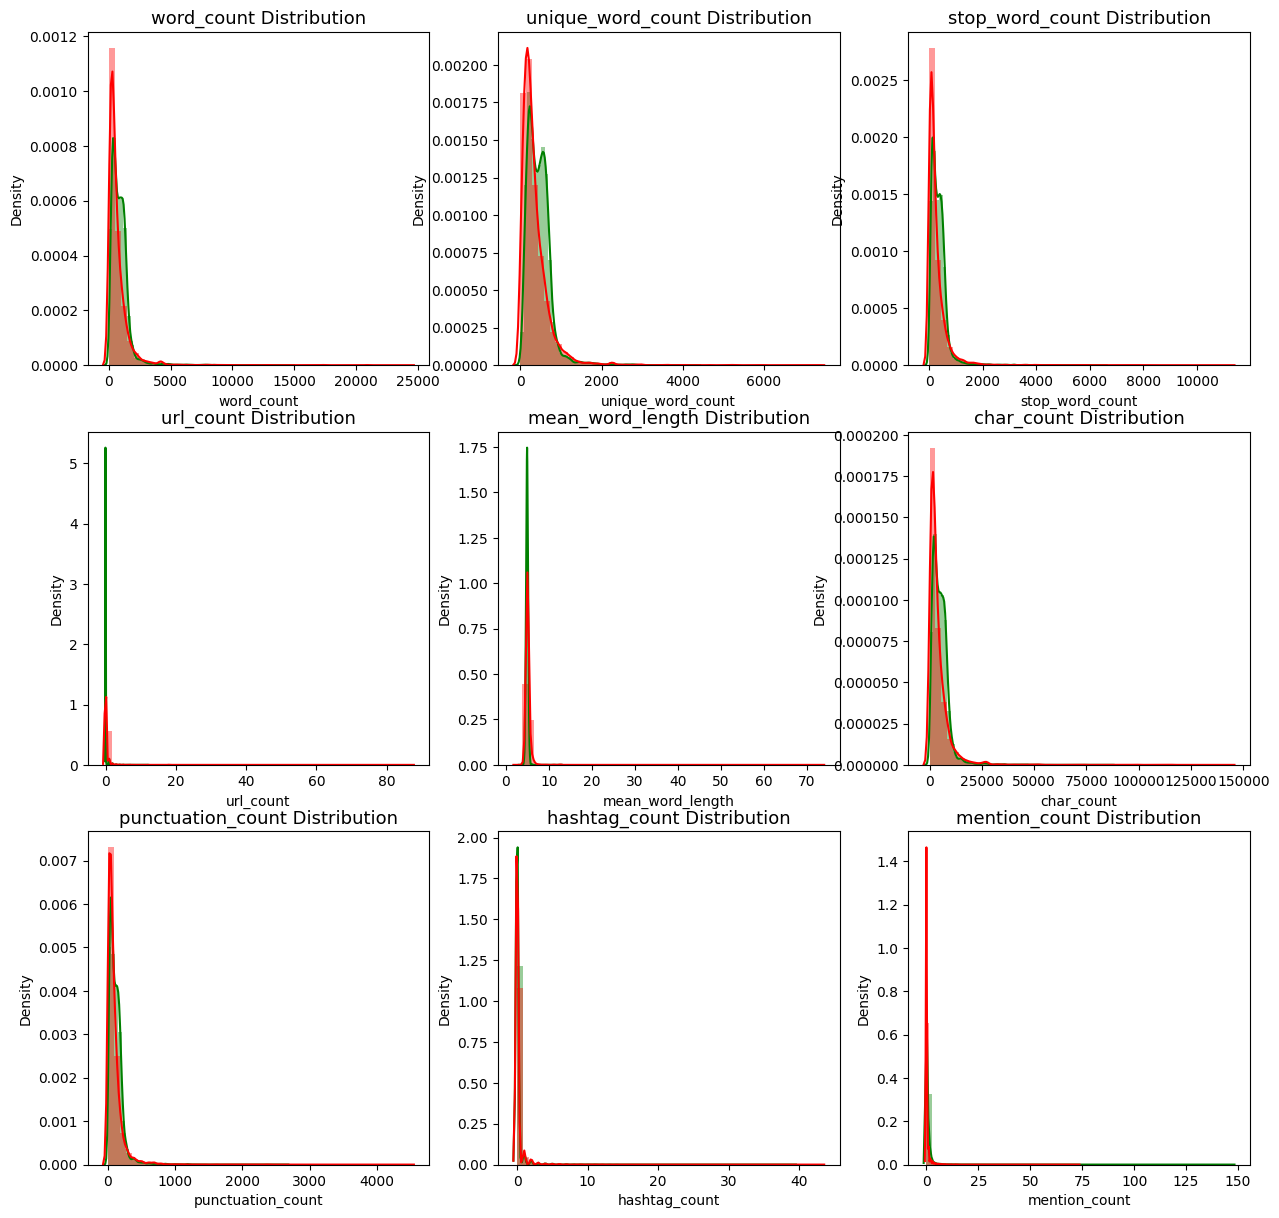

In [ ]:
import warnings
warnings.filterwarnings('ignore')

METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
FAKE_NEWS = news['label'] == 1


# Create a 3x3 subplot figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15), dpi=100)

# Flatten the subplot array
axes = axs.flatten()

# Loop through the subplot array and create a distplot for each column
for i, column in enumerate(METAFEATURES):
    sns.distplot(news.loc[~FAKE_NEWS][column], label='Not Fake', ax=axes[i], color='green')
    sns.distplot(news.loc[FAKE_NEWS][column], label='Fake', ax=axes[i], color='red')
    axes[i].set_title(f'{column} Distribution', fontsize=13)
    

# Show the plot
plt.show()

## 5. Text Preprocessing using nLTK library<a name=5></a>

NLTK (Natural Language Toolkit) is a popular open-source Python library for working with human language data. It provides tools for natural language processing, such as text preprocessing, analysis, part-of-speech tagging, and machine learning, to help with tasks such as sentiment analysis, topic modeling, and text classification.

In [ ]:
df1.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news=df1.dropna().copy()

In [ ]:
news.reset_index(inplace=True)

In [ ]:
news['text'][6]  #just checking if everything is fine

'Ever wonder how Britain’s most iconic pop pianist gets through a long flight? Here are the six pictures of sharks Sir Elton John likes to stare at to pass the time on an airplane. 1. A Shark Swimming \nSit next to Elton John on a flight and you’ll see a man living in the lap of luxury, as he immediately tapes this photo of a shark darting through the ocean over his window to stare at throughout the trip. The platinum-selling artist has been known to pull his window shade down to make the shark disappear, and then quickly retract it to mark the animal’s triumphant return. He will often repeat this act dozens of times per flight. 2. A Great White Shark Leaping Into The Air \nWhen you’re an international pop sensation worth an estimated $450 million, people go the extra mile to make you happy. Flight crews are instructed to place this photo of a breaching great white in Elton John’s seat-back pocket before he even boards the plane. The five-time Grammy winner loves to pull the image out 

## 5.1 Creating the corpus<a name=5.1></a>

Over here we are preprocessing our text

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
import re
ps = PorterStemmer() # This line initializes a PorterStemmer object, which is a type of stemming algorithm that removes the suffixes from words in order to reduce them to their base form.
corpus = [] # This line initializes an empty list called corpus which will be used to store the pre-processed text data
for i in range(0, len(news)): #This line begins a for loop that iterates through each row of the news dataframe.
    review = re.sub('[^a-zA-Z]', ' ', news['text'][i]) # This line uses regular expressions (imported via re) to remove any characters that are not letters (e.g. numbers, punctuation) from the text in the text column of the news dataframe at index i. It replaces these characters with a space.
    review = review.lower() # This line converts all of the remaining letters in the text to lowercase.
    review = review.split() # This line splits the text into individual words, creating a list of words.
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] # This line uses list comprehension to iterate through each word in the review list, and applies stemming using the PorterStemmer object (ps.stem(word)) to each word that is not in the list of English stopwords (imported via stopwords.words('english')). This means that common English words (such as "the", "and", "is", etc.) will be excluded from stemming.
    review = ' '.join(review) # This line joins the stemmed words back together into a single string, separated by spaces.
    corpus.append(review) # This line appends the pre-processed text to the corpus list.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# saving the corpus for future use 
with open("corpus", "wb") as fp:  
    pickle.dump(corpus, fp)

In [ ]:
# reading the corpus if its already saved 
with open("corpus", "rb") as fp:   # Unpickling
  corpus = pickle.load(fp)

In [ ]:
corpus[3] #after applying the above transformation and stemming

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [ ]:
news['text'][3] # our original text

'Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilians are being killed by American airstrikes in Afghanistan is now higher than it was in 2014 when the US was engaged in active combat operations.   Photo of Hellfire missiles being loaded onto a US military Reaper drone in Afghanistan by Staff Sgt. Brian Ferguson/U.S. Air Force. \nThe Bureau has been able to identify 15 civilians killed in a single US drone strike in Afghanistan last month – the biggest loss of civilian life in one strike since the attack on the Medecins Sans Frontieres hospital (MSF) last October. \nThe US claimed it had conducted a “counter-terrorism” strike against Islamic State (IS) fighters when it hit Nangarhar province with missiles on September 28. But the next day the United Nations issued an unusually rapid and strong statement saying the strike had killed 15 civilians and injured 13 others who had gathered at a house to celebrate a tribal elder’s return from a pil

In [ ]:
news['label']=df['label']

## 6. Modeling<a name=6></a>

### Tf-IDF 

TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is a widely used text preprocessing technique in natural language processing (NLP) to convert text data into a numerical representation that can be easily analyzed by machine learning algorithms.

TF-IDF vectorizer assigns a numerical value to each word in a document based on two metrics: term frequency (TF) and inverse document frequency (IDF).

Term Frequency (TF): This measures the frequency of a word in a particular document. The more frequent a word appears in a document, the higher its TF score. The formula for TF is:

TF = (Number of times the term appears in a document) / (Total number of terms in the document)

Inverse Document Frequency (IDF): This measures how important a word is to the entire corpus (i.e., all the documents). The less frequent a word appears in the corpus, the higher its IDF score. The formula for IDF is:

IDF = log_e(Total number of documents / Number of documents with term t in it)

Once TF and IDF are calculated for each word in the corpus, the TF-IDF vectorizer multiplies the two values to obtain the final weight for each word. This creates a sparse matrix representation of the corpus, with each row representing a document and each column representing a word.

The resulting TF-IDF matrix can be used as input for machine learning models to classify or cluster text data, extract important keywords or topics, or perform other NLP tasks.

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=10000,ngram_range=(1,3)) # we used 100000 as max features but this is something that can be played around with
X=tfidf_v.fit_transform(corpus).toarray()


In [ ]:
y=news['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
tfidf_v.get_feature_names_out()[:10] # After applying the TfidfVectorizer, we can get the feature names using the get_feature_names_out() method:

array(['aaron', 'aaron klein', 'abandon', 'abba', 'abbott', 'abc',
       'abc news', 'abduct', 'abdullah', 'abe'], dtype=object)

In [ ]:
tfidf_v.get_params() #all the transformations that we applied through TFIDF

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())

In [ ]:
count_df.head() # this is just to visualise our transformations, we will not be using this df

,aaron,aaron klein,abandon,abba,abbott,abc,abc news,abduct,abdullah,abe,...,zero,zero hedg,zika,zika viru,zionist,zone,zone syria,zoo,zu,zuckerberg
0,0.0,0.0,0.028678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.056759,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 6.1 MultinomialNB Algorithm<a name=6.1></a>

Based on the traditional NLP approach, here onwards we have used various classifiers to do test submissions on Kaggle and have evaluated our models based on the scores achieved.

accuracy:   0.911
Confusion matrix, without normalization


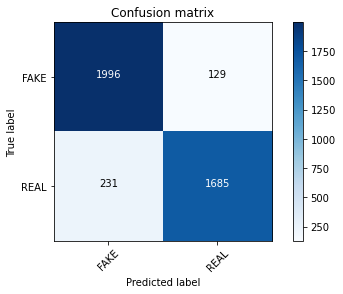

In [ ]:
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Take away from confusion matrix
our model here has done a better job at predicting fake rather than real which according to us is better. In this problem having a higher false positive rate would be better as we would not want to miss out on fake news

ROC Score: 0.9752742232592411


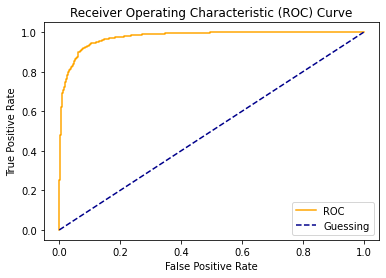

In [ ]:
# Make predictions with probabilities
y_probs = classifier.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
roc=roc_auc_score(y_test, y_probs)
print(f"ROC Score: {roc}")    
plot_roc_curve(fpr, tpr)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2125
           1       0.93      0.88      0.90      1916

    accuracy                           0.91      4041
   macro avg       0.91      0.91      0.91      4041
weighted avg       0.91      0.91      0.91      4041



### 6.1.1 Test Set Transformation using TF-IDF<a name=6.1.1></a>

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/NLP/test.csv', encoding="utf-8") # this is test set from kaggle

In [ ]:
test[['text','title']]=test[['text','title']].astype('str')

In [ ]:
# doing the same transformation as on train

test_corpus = []
for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', ' ', test['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    test_corpus.append(review)

In [ ]:
# saving the test corpus for future use 
with open("test_corpus", "wb") as fp:  
    pickle.dump(test_corpus, fp)

In [ ]:
# reading the test corpus if its already saved 
with open("test_corpus", "rb") as fp:   # Unpickling
  test_corpus = pickle.load(fp)

In [ ]:
X_final_test=tfidf_v.transform(test_corpus).toarray() # TF-IDF verctorisation on test set


### 6.1.2 Training on entire training set and predictions on test<a name=6.1.2></a>

In [ ]:
# for the final submission we will also perform some hyper parameter tuning
parameters = {'alpha': (1e-2, 1e-3, 1e-4)}
grid_search = GridSearchCV(estimator=MultinomialNB(), cv=5,  param_grid=parameters, error_score=0.0, n_jobs = -1, verbose = 0)
grid_search.fit(X,y)
pred_test = grid_search.predict(X_final_test) # test predictions


In [ ]:
len(pred_test)

5200

In [ ]:
test['label']=pred_test

### Submission<a name=6.1.3></a>

In [ ]:
submission_nb=test[['id','label']]
submission_nb.to_csv('submission_nb.csv', index=False) # having a csv file as per kaggle requirement

# Score on Kaggle- 0.911

### 6.2 Support Vector Machines<a name=6.2></a>
- SVM takes too long to train, we have left the code here

In [ ]:
# param_grid = {'C': [0.1,1, 10,100], 'gamma': [1,0.1,0.01],'kernel': ['rbf']}
# clf = svm.SVC()
# grid = RandomizedSearchCV(clf,param_grid,refit=True,verbose=2,n_iter=5)
# grid.fit(X,y)




### 6.3 Passive Aggressive Classifier Algorithm<a name=6.3></a>

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
paca_clf = PassiveAggressiveClassifier()

accuracy:   0.956
Confusion matrix, without normalization


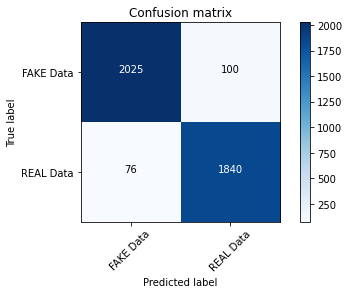

In [ ]:
paca_clf.fit(X_train, y_train)
pred = paca_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [ ]:
#trainging on entire data and predicting on kaggle submission set and saving submission file
paca_clf.fit(X, y)
pred_test=paca_clf.predict(X_final_test)
test['label']=pred_test
submission_pa=test[['id','label']]
submission_pa.to_csv('submission_pa.csv', index=False)

## Kaggle Score 0.95448

Passive aggressive has got us the best score on the test submission on kaggle

### 6.4 Max Ent Classifier<a name=6.4></a>
- training, prediction and submission

In [ ]:
#over here we are training on entire data directly and predicting on test, saving submission file
from sklearn.linear_model import LogisticRegression
max_ent_grid= {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid_search_max = GridSearchCV(estimator=LogisticRegression(), cv=5,  param_grid=max_ent_grid)
grid_search_max.fit(X,y)
pred_test = grid_search.predict(X_final_test)
test['label']=pred_test
submission_me=test[['id','label']]
submission_me.to_csv('submission_me.csv', index=False)

# Kaggle Score 0.91153

#  Part B Neural Networks

### 7. LSTM<a name=7></a>

In [ ]:
import sys
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
import numpy as np

# df=pd.read_csv('/content/drive/MyDrive/NLP/train.csv') # read this file again if needed

In [ ]:
### Vocabulary size, this is a parameter to play around with
voc_size=10000

### 7.1 Text Pre processing for LSTM Neural Network<a name=7.1></a>

In [ ]:
# run this cell only if corpus is not generated previously
with open("/content/drive/MyDrive/NLP/corpus", "rb") as fp:   # Unpickling
  corpus = pickle.load(fp)

In [ ]:
#one hot representation of the words using keras
onehot=[one_hot(words,voc_size)for words in corpus] 

# In the context of an LSTM model, one hot encoding is often used to represent input sequences where each element in the sequence is a categorical variable. The LSTM model can then learn to recognize the relationships between the categories and their corresponding inputs over time.

In [ ]:
# need to get the maximum length of sentence
length=[]
for i in range(len(onehot)):
  length.append(len(onehot[i]))
sent_length=max(length)

In [ ]:
# Emedding layer
sent_length=sent_length
embedded_docs=pad_sequences(onehot,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 5842  108 4781]
 [   0    0    0 ... 9163 6274 5877]
 [   0    0    0 ... 4094 4996   89]
 ...
 [   0    0    0 ... 2562 3640 8959]
 [   0    0    0 ... 6579 9608 8132]
 [   0    0    0 ... 3107 9876   91]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0, ..., 5842,  108, 4781], dtype=int32)

In [ ]:
# Creating traing and test splits
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

### 7.2 Model Construction<a name=7.2></a>

In [ ]:
from keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=128
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.2)) # prevent overfitting with droputs
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

# note- we experimented and added dropout to prevent overfitting

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12059, 128)        1280000   
                                                                 
 dropout (Dropout)           (None, 12059, 128)        0         
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
253/253 [==============================] - 141s 525ms/step - loss: 0.3186 - accuracy: 0.8542 - val_loss: 0.3141 - val_accuracy: 0.8562
Epoch 2/10
253/253 [==============================] - 128s 508ms/step - loss: 0.1497 - accuracy: 0.9469 - val_loss: 0.2023 - val_accuracy: 0.9297
Epoch 3/10
253/253 [==============================] - 126s 497ms/step - loss: 0.0808 - accuracy: 0.9712 - val_loss: 0.2117 - val_accuracy: 0.9230
Epoch 4/10
253/253 [==============================] - 124s 492ms/step - loss: 0.0395 - accuracy: 0.9865 - val_loss: 0.2851 - val_accuracy: 0.9310
Epoch 5/10
253/253 [==============================] - 122s 481ms/step - loss: 0.0312 - accuracy: 0.9889 - val_loss: 0.3485 - val_accuracy: 0.9275
Epoch 6/10
253/253 [==============================] - 121s 478ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.3678 - val_accuracy: 0.9060
Epoch 7/10
253/253 [==============================] - 119s 473ms/step - loss: 0.0210 - accuracy: 0.9926 - val_loss: 0.3589 -

### 7.3 Test set transformation<a name=7.3></a>

In [ ]:
# run this cell only if test_corpuscorpus is not generated previously
with open("/content/drive/MyDrive/NLP/test_corpus", "rb") as fp:   # Unpickling
  test_corpus = pickle.load(fp)

In [ ]:
onehot_test=[one_hot(words,voc_size)for words in test_corpus] 

In [ ]:
sent_length_test=sent_length
embedded_docs_test=pad_sequences(onehot_test,padding='pre',maxlen=sent_length_test)
print(embedded_docs_test)

[[   0    0    0 ... 1075 4737 6289]
 [   0    0    0 ...  961 3267 7050]
 [   0    0    0 ... 3654 2193 5790]
 ...
 [   0    0    0 ... 1353 3665 3578]
 [   0    0    0 ... 8298 5683 3267]
 [   0    0    0 ... 6401 3223 1867]]


In [ ]:
X_final_test=np.array(embedded_docs_test)


### 7.4 Predictions on test<a name=7.4></a>

In [ ]:
probs=model.predict(X_final_test)
classes_test=np.argmax(probs,axis=1)
classes_test

163/163 [==============================] - 21s 126ms/step


array([0, 1, 1, ..., 0, 1, 0])

### Submission file

In [ ]:
test['label']=classes_test
submission_lstm=test[['id','label']]
submission_lstm.to_csv('submission_lstm.csv', index=False)

## Kaggle Score- 0.92582

## 8. Transformers & Transfer Learning<a name=8></a>

Prior to transformers, LSTMs were actually the State of the Art. However, 2017 brought a change of paradigm: in a research paper by Google, a new neural network architecture for sequence modelling was introduced: teh transformers.

These architectures performed better than RNNs, bringing the concept of self-attention to the table. This was a step ahead the original concept of attention, which already brought a better efficiency to focus on the most relevant tokens in the input data. 

However, one relevant element in the success of the architecture, actually derives from other fields such as Computer Vision. The size of the data, and the computational costs of training with it, set a clear path towards a new field in Machine Learning: Transfer Learning.

This novel technique democratized development and incremented the advancements made by the community. We are lucky to be able to use this concept, leveraging the library `HuggingFace`.

Let's jump into it's implementation!

In [ ]:
# installing the required library
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 8.1 Importing all the required libraries and loading the train set<a name=8.1></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pickle
import os
SEED = 42
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
from transformers import logging
logging.set_verbosity_warning()

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/NLP/train.csv', encoding="utf-8")


In [ ]:
train=train[['text','label','title']].dropna().reset_index() # we will only use the text and label columns for this task

### 8.2 Define pretrained tokenizer and model<a name=8.2></a>


In [ ]:
model_name = 'Giyaseddin/distilbert-base-cased-finetuned-fake-and-real-news-dataset'
tokenizer = AutoTokenizer.from_pretrained(model_name)

### 8.3 Creating our training and validation set<a name=8.3></a>

In [ ]:
X = list(train["text"])
y = list(train["label"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True)


### 8.4 Function to create torch dataset<a name=8.4></a>

In [ ]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

### 8.5 Applying the function to our train and validation set<a name=8.5></a>


In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

### 8.6 Define Trainer parameters to fine tune model<a name=8.6></a>

As in any Machine Learning project, the is no Free Lunch Theorem: here is no single solution that is guaranteed to work best in all situations. Being our task `text-classification`, we should try transformer whose architectures better match our objective. 

In this sense, the Encoder-only architecture is the most suitable family of transformers for the given task. Among this family, we highlight two models: BERT and RoBERTa, and their respective variants.

Our approach will be focusing on both groups, and finding in the HuggingFace community fine-tuned versions of them related to the task at hand.

In [ ]:

def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
# Define Trainer
training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs = 2,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 64,
    warmup_steps = 500,
    learning_rate = 1e-5,
    weight_decay = 0.005,
    logging_dir = './logs',
    logging_steps = 10
)

model = DistilBertForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = val_dataset,
    compute_metrics=compute_metrics
)

We ran several of these variants. As we can't assume RoBERta outperforming BERT, we have to actually test if a fine-tuned version of BERT may actually end up being the top-performer.

In [ ]:
# Train pre-trained model
trainer.train()

***** Running training *****
  Num examples = 16162
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 2022
  Number of trainable parameters = 65783042


Step,Training Loss
10,12.216800
20,12.309600
30,12.007500
40,12.827800
50,11.866000
60,12.188900
70,12.541300
80,11.856800
90,11.969200
100,11.749700


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=2022, training_loss=1.1362581888602266, metrics={'train_runtime': 1521.9031, 'train_samples_per_second': 21.239, 'train_steps_per_second': 1.329, 'total_flos': 4281876194156544.0, 'train_loss': 1.1362581888602266, 'epoch': 2.0})

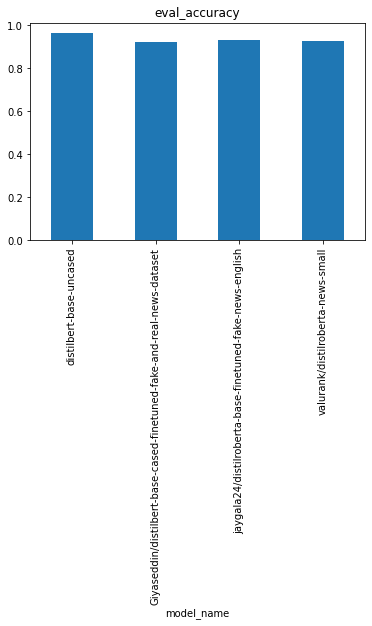

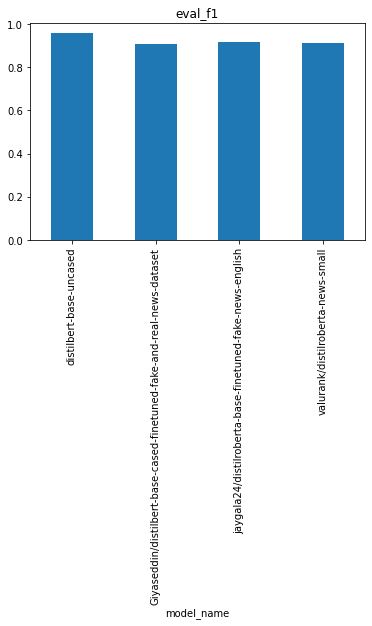

In [ ]:
import plotly.graph_objects as go

dfx=pd.read_csv('/content/drive/MyDrive/NLP/NLP Group project/Data/Experiments/experiments.csv')

# Set the model name as the index
dfx = dfx.set_index('model_name')

# Create a bar plot for each performance metric
metrics = ['eval_accuracy', 'eval_f1']

# Loop through each metric and create a bar plot for each model's performance for that metric
for metric in metrics:
    plt.figure()
    dfx[metric].plot(kind='bar')
    plt.title(metric)
    plt.show()

In this aspect, and after several experiments, we came up with our final selected model. With both excellent `F1 Score` and `Accuracy`, a fine tuned version of distilbert, optimized for the task at hand, was the chosen one: `distilbert-base-uncased-finetuned-fake-and-real-dataset`.

### 8.7 Test transformation- Set from Kaggle<a name=8.7></a>

In [ ]:
# Load test data
test=pd.read_csv('/content/drive/MyDrive/NLP/test.csv', encoding="utf-8")
X_test = list(test["text"])

In [ ]:
test=test[['text']].astype('str')
X_test = list(test["text"])

In [ ]:
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True)


In [ ]:
# Create torch dataset
test_dataset = Dataset(X_test_tokenized)

### 8.8 Predictions on test<a name=8.8></a>

In [ ]:
# Make prediction
predictions = trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 5200
  Batch size = 64


In [ ]:
# storing predicted labels
predicted_scores = predictions.predictions
predicted_labels = np.argmax(predicted_scores, axis=1)

In [ ]:
# reading the file again to create submission file as required by Kaggle
test_sub=pd.read_csv('/content/drive/MyDrive/NLP/test.csv', encoding="utf-8")


In [ ]:
# Final submission file as required by Kaggle
test_sub['label']=predicted_labels
submission_trans=test_sub[['id','label']]
submission_trans.to_csv('submission_trans.csv', index=False)

## Final Score on Kaggle- 0.97417

## Conclusion<a name=9></a>

In [ ]:
scores = {'MultinomialNB': [0.911],
        'Passive Aggressive Classifier': [0.955],
        'Max Ent Classifier': [0.911],
        'LSTM': [0.926],
        'Transformer': [0.974]}

df_scores = pd.DataFrame(scores)
df_scores

,MultinomialNB,Passive Aggressive Classifier,Max Ent Classifier,LSTM,Transformer
0,0.911,0.955,0.911,0.926,0.974


We accomplished the following:

- Did extensive EDA on our train set and understood certain nuances of the textual information that we were dealing with

- We then approached the task using traditional NLP techniques

- We first prepared a corpus by removing all the stop words and applying stemming. We also removed all punctuations etc. 

- Once we had the corpus prepared then we used TF-IDF technique to transform the text into vectors

- After doing a train test split we used various classifiers from traditional machine learning and got the best result from the Passive Aggressive algorithm

- Part B of our project included neural networks and the first architecture that we used was LSTM

- The second technique that we used was the state of the art transformers and transfer learning and this one did give us the best results

- As next steps we would like to build an app (factify) and deploy it as a browser extension to detect factual information